# IMT 511 PS 05: data programming

In [58]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import csv

# read data

read in the data file 'weatherHistory.csv.bz2'.  Understand it's
structure.  Consult the companion text file for a brief variable
descriptions.

inspect a few lines of the data and find the number of rows and columns

Hint: use pd.sample(), pd.head(), pd.tail()

In [59]:
weather = pd.read_csv('weatherHistory.csv.bz2')
# print(weather)
print("There are 96453 rows x 12 columns.")
headings = weather.head()
print(headings)

There are 96453 rows x 12 columns.
                            time        summary precip      temp   appTemp  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy   rain  9.472222  7.388889   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy   rain  9.355556  7.227778   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy   rain  9.377778  9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy   rain  8.288889  5.944444   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy   rain  8.755556  6.977778   

   humidity     wind  bearing  visibility  cloudCover  pressumre  \
0      0.89  14.1197    251.0     15.8263         0.0    1015.13   
1      0.86  14.2646    259.0     15.8263         0.0    1015.63   
2      0.89   3.9284    204.0     14.9569         0.0    1015.94   
3      0.83  14.1036    269.0     15.8263         0.0    1016.41   
4      0.83  11.0446    259.0     15.8263         0.0    1016.51   

                        dailySummary  
0  Partly cloudy throughout the day.  
1  Partly

## Select 2015 observations only

Select only observations for 2015.

Hint: 'time' is of a string data type (well, it is a Series of
string).  Use string methods to select 2015 data only.

Hint2: you have to use `.str` attribute to get a string out of series.

Hint3: don't just make a subset, make a copy of subset.

Find how many observations are there for 2015 only.

In [65]:
weather2015 = weather.loc[weather['time'].str.startswith('2015')].copy(deep=True)
print("There were ", len(weather2015), " weather observations in 2015.")

There were  8760  weather observations in 2015.


## Create a new variable 'timestamp' which is variable 'time'
## converted to datetime type

Hint: use Pandas.to_datetime
(code given, adjust variable names)

In [71]:
#data['timestamp'] = pd.to_datetime(data.time)
weather2015['timestamp'] = pd.to_datetime(weather2015.time)
headings = weather2015.head()
print(headings)

                                time              summary precip       temp  \
78909  2015-04-01 00:00:00.000 +0200             Overcast   rain  11.016667   
78910  2015-04-01 01:00:00.000 +0200  Breezy and Overcast   rain  10.994444   
78911  2015-04-01 02:00:00.000 +0200             Overcast   rain   9.872222   
78912  2015-04-01 03:00:00.000 +0200             Overcast   rain   8.838889   
78913  2015-04-01 04:00:00.000 +0200             Overcast   rain   8.305556   

         appTemp  humidity     wind  bearing  visibility  cloudCover  \
78909  11.016667      0.71  24.9228    309.0     10.2557         0.0   
78910  10.994444      0.62  31.1535    300.0     10.2557         0.0   
78911   7.016667      0.64  22.2985    309.0     14.3934         0.0   
78912   6.561111      0.67  14.5061    310.0     15.1823         0.0   
78913   5.605556      0.67  16.8889    290.0     15.1823         0.0   

       pressumre                                       dailySummary  \
78909    1004.56  Mos

## Sort data by date

This data is in an arbitrary order.  Ensure it is ordered by time

Hint: use Pandas.sort_values method

In [72]:
weather2015.sort_values('timestamp')

,time,summary,precip,temp,appTemp,humidity,wind,bearing,visibility,cloudCover,pressumre,dailySummary,timestamp
81789,2015-01-01 00:00:00.000 +0100,Clear,snow,-12.650000,-12.650000,0.83,3.0751,240.0,4.1699,0.0,0.00,Partly cloudy starting overnight continuing un...,2015-01-01 00:00:00+01:00
81790,2015-01-01 01:00:00.000 +0100,Mostly Cloudy,snow,-13.066667,-13.066667,0.84,2.8175,247.0,4.8944,0.0,1038.57,Partly cloudy starting overnight continuing un...,2015-01-01 01:00:00+01:00
81791,2015-01-01 02:00:00.000 +0100,Clear,snow,-11.994444,-11.994444,0.86,1.8998,262.0,6.1663,0.0,0.00,Partly cloudy starting overnight continuing un...,2015-01-01 02:00:00+01:00
81792,2015-01-01 03:00:00.000 +0100,Mostly Cloudy,snow,-10.933333,-10.933333,0.86,3.3166,285.0,6.1985,0.0,1038.40,Partly cloudy starting overnight continuing un...,2015-01-01 03:00:00+01:00
81793,2015-01-01 04:00:00.000 +0100,Partly Cloudy,snow,-9.705556,-9.705556,0.82,3.1717,237.0,7.8729,0.0,1038.16,Partly cloudy starting overnight continuing un...,2015-01-01 04:00:00+01:00
81794,2015-01-01 05:00:00.000 +0100,Clear,snow,-9.822222,-9.822222,0.79,0.5152,270.0,8.1305,0.0,0.00,Partly cloudy starting overnight continuing un...,2015-01-01 05:00:00+01:00
81795,2015-01-01 06:00:00.000 +0100,Partly Cloudy,snow,-9.822222,-9.822222,0.83,4.7978,286.0,9.9820,0.0,1037.80,Partly cloudy starting overnight continuing un...,2015-01-01 06:00:00+01:00
81796,2015-01-01 07:00:00.000 +0100,Mostly Cloudy,snow,-9.050000,-13.011111,0.85,7.2289,182.0,7.8729,0.0,1037.45,Partly cloudy starting overnight continuing un...,2015-01-01 07:00:00+01:00
81797,2015-01-01 08:00:00.000 +0100,Clear,snow,-7.700000,-11.733333,0.77,7.9212,202.0,8.1305,0.0,0.00,Partly cloudy starting overnight continuing un...,2015-01-01 08:00:00+01:00
81798,2015-01-01 09:00:00.000 +0100,Clear,snow,-7.122222,-11.050000,0.73,7.9212,212.0,7.2128,0.0,0.00,Partly cloudy starting overnight continuing un...,2015-01-01 09:00:00+01:00


# Noon temperature only

Select a subset from your 2015 data that only contains data for noon
(12:00:00).

Hint: you can either find a string, corresponding to noon, in the
string variable 'time', or extract hour from the timestamp like this:
`w15.timestamp.apply(lambda x: x.hour)`
This example code creates a variable that is only the hour (0-23).

In [89]:
weather2015noon = weather2015[weather2015.time.str.contains(' 12:00:00', regex=False)].copy()
print(weather2015noon.shape)
print(weather2015noon.head(5))

(365, 13)
                                time                   summary precip  \
78921  2015-04-01 12:00:00.000 +0200  Breezy and Partly Cloudy   rain   
78945  2015-04-10 12:00:00.000 +0200             Mostly Cloudy   rain   
78969  2015-04-11 12:00:00.000 +0200             Partly Cloudy   rain   
78993  2015-04-12 12:00:00.000 +0200             Partly Cloudy   rain   
79017  2015-04-13 12:00:00.000 +0200             Partly Cloudy   rain   

            temp    appTemp  humidity     wind  bearing  visibility  \
78921  12.127778  12.127778      0.46  34.9692    299.0      9.9820   
78945  17.222222  17.222222      0.24   4.8783    118.0     16.1000   
78969  18.977778  18.977778      0.37   4.9266    216.0     16.1000   
78993  22.177778  22.177778      0.33  14.2968    358.0     16.1000   
79017  22.216667  22.216667      0.33  16.0356    278.0     10.2557   

       cloudCover  pressumre  \
78921         0.0    1010.27   
78945         0.0    1029.18   
78969         0.0    1023.25

# make a plot

Make a plot that depicts the temperature through 2015
Add a descriptive title, label the axis.  Use a good font size. 
Use a non-default line color for the plot.

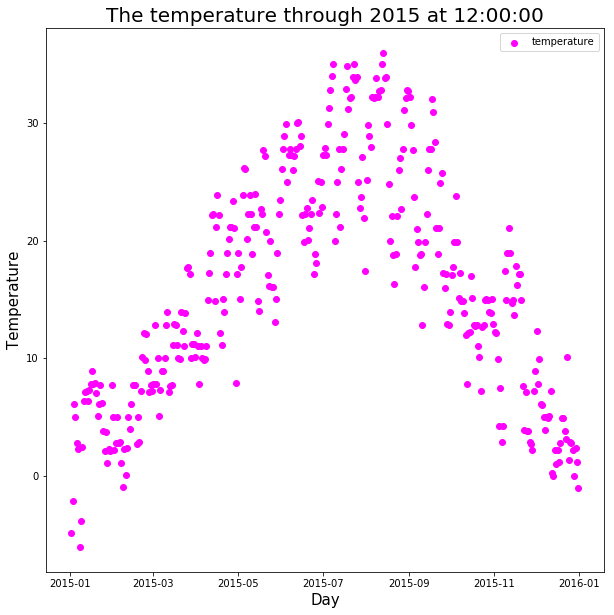

In [97]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(10,10))
X = weather2015noon.timestamp
Y = weather2015noon.temp
plt.scatter(X, Y, label = 'temperature', color = 'Magenta')
plt.title('The temperature through 2015 at 12:00:00', {'fontsize' :20})
plt.xlabel('Day', {'fontsize': 15})
plt.ylabel('Temperature', {'fontsize': 15})
a = plt.legend()